<a href="https://colab.research.google.com/github/alfanugraha/rumahcoding/blob/master/machine-learning-mini-bootcamp/data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Install Library

In [ ]:
!pip install pandas seaborn matplotlib scikit-learn

## 2. Import Library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


## 3. Persiapan

### a. Membaca File Harga Rumah (CSV)

Mendownload file CSV yang berisi data harga rumah hasil web scraping dari website.

In [ ]:
! gdown 1vY3aw4DrDBRVboI7tqn4WTI9ZSnerzdR

Downloading...
From: https://drive.google.com/uc?id=1vY3aw4DrDBRVboI7tqn4WTI9ZSnerzdR
To: /content/harga_rumah.csv
100% 286k/286k [00:00<00:00, 7.15MB/s]


Membaca File CSV

In [ ]:
df = pd.read_csv('harga_rumah.csv')

### b. Menampilkan Beberapa Data

Menampilkan Beberapa Data Pertama (`head()`)

In [ ]:
df.head()

,city,title,price,location,area,building_area,bedrooms,bathrooms,garage
0,Jakarta Selatan,Dijual Rumah Sultan Mewah Full Furnish Di Kema...,Rp 45 Miliar,"Kemang, Jakarta Selatan",: 730 m²,: 1100 m²,7.0,8.0,10.0
1,Jakarta Selatan,Rumah Mewah S Pool Cilandak Jakarta Selatan,"Rp 69,9 Miliar","Cilandak, Jakarta Selatan",: 4500 m²,: 2500 m²,12.0,8.0,5.0
2,Jakarta Selatan,"Rumah Mewah 3 Lantai Ada Roof Top, Dalam Kompl...","Rp 7,91 Miliar","Pondok Indah, Jakarta Selatan",: 128 m²,: 302 m²,3.0,3.0,2.0
3,Jakarta Selatan,Rumah 1 Lantai Di Cipete Kebayoran Baru Lokasi...,"Rp 14,5 Miliar","Cipete, Jakarta Selatan",: 518 m²,: 450 m²,5.0,6.0,5.0
4,Jakarta Selatan,Rumah Bagus Rapih Siap Huni di Sektor 6 Bintar...,Rp 3 Miliar,"Bintaro, Jakarta Selatan",: 120 m²,: 90 m²,4.0,2.0,NaN


Menampilkan Beberapa Data Terakhir (`tail()`)

In [ ]:
df.tail()

,city,title,price,location,area,building_area,bedrooms,bathrooms,garage
1992,Bekasi,Rumah Vernonia Residence 9x18 Standard Summare...,"Rp 3,2 Miliar","Summarecon Bekasi, Bekasi",: 162 m²,: 149 m²,3.0,3.0,2.0
1993,Bekasi,Dijual Rumah bagus di Citra gran cibubur CBD,"Rp 2,85 Miliar","Cibubur, Bekasi",: 120 m²,: 112 m²,3.0,2.0,NaN
1994,Bekasi,"Rumah Di Wibawa Mukti, Jatiasih, Jatisari, Bek...",Rp 799 Juta,"Bekasi, Bekasi",: 150 m²,: 120 m²,3.0,2.0,1.0
1995,Bekasi,Rumah Baru Bagus Murah Kali Di Taman Harapan Baru,Rp 570 Juta,"Harapan Indah, Bekasi",: 66 m²,: 50 m²,2.0,1.0,1.0
1996,Bekasi,Dijual Rumah Di Grand Mutiara Gading Setu Bekasi,Rp 450 Juta,"Setu, Bekasi",: 60 m²,: 40 m²,2.0,1.0,1.0


In [ ]:
df.iloc[[10, 20, 30]]

,city,title,price,location,area,building_area,bedrooms,bathrooms,garage
10,Jakarta Selatan,Rumah Hitung Tanah Jl Niaga Hijau Pondok Indah...,Rp 14 Miliar,"Pondok Pinang, Jakarta Selatan",: 442 m²,: 380 m²,5.0,4.0,2.0
20,Jakarta Selatan,Bisa Untuk Cafe Rumah Siap Huni Lokasi Strateg...,"Rp 14,5 Miliar","Gandaria, Jakarta Selatan",: 250 m²,: 160 m²,3.0,3.0,NaN
30,Jakarta Selatan,Dijual Rumah Kemang Bebas Banjir Daerah Tenang...,"Rp 10,6 Miliar","Kemang, Jakarta Selatan",: 449 m²,: 649 m²,6.0,6.0,2.0


### c. Menampilkan Statistik Deskriptif

Statistik deskriptif adalah informasi global tentang data. Berisi statistik seperti mean, median, std, min, max, dan lain-lain.

>
> Hanya untuk kolom numerik
>

In [ ]:
df.describe()

,bedrooms,bathrooms,garage
count,1979.000000,1973.000000,1282.000000
mean,3.565942,2.891536,1.893916
std,2.100862,2.050675,1.335743
min,1.000000,1.000000,1.000000
25%,3.000000,2.000000,1.000000
50%,3.000000,3.000000,2.000000
75%,4.000000,4.000000,2.000000
max,50.000000,50.000000,15.000000


## 4. Penangangan Missing Value

Missing value adalah nilai yang kosong atau tidak ada. Missing value dapat mempengaruhi analisis data dan hasil prediksi model machine learning. Oleh karena itu, perlu dilakukan penanganan secara baik.

### a. Mengecek Missing Value

In [ ]:
df.isnull().sum()

,0
city,0
title,0
price,0
location,0
area,0
building_area,21
bedrooms,18
bathrooms,24
garage,715


Dari hasil di atas, terlihat bahwa ada beberapa missing value di kolom `building_area`, `bedrooms`, `bathrooms` dan `garage`.

Untuk mengecek data apa saja yang memiliki `building_area` null, kita bisa menggunakan perintah berikut:

In [ ]:
df[df['building_area'].isnull()]

,city,title,price,location,area,building_area,bedrooms,bathrooms,garage
26,Jakarta Selatan,Dijual Cepat Rmh Kost Putri Terbaik,"Rp 8,5 Miliar","Mampang Prapatan, Jakarta Selatan",: 385 m²,NaN,NaN,NaN,NaN
45,Jakarta Selatan,Rumah Akses Jalan 2 Mobil - Hanya Hitung Harga...,"Rp 5,5 Miliar","Tebet, Jakarta Selatan",: 120 m²,NaN,NaN,NaN,NaN
97,Jakarta Selatan,Jual Rumah Hitung Tanah Prime Area Pondok Indah,"Rp 18,5 Miliar","Pondok Indah, Jakarta Selatan",: 200 m²,NaN,NaN,NaN,NaN
132,Jakarta Selatan,Jual Rumah Hitung Tanah Prime Area Pondok Indah,"Rp 18,5 Miliar","Pondok Indah, Jakarta Selatan",: 200 m²,NaN,NaN,NaN,NaN
305,Jakarta Timur,Rumah Siap Huni Kavling Dki Pondok Kelapa,"Rp 1,65 Miliar","Pondok Kelapa, Jakarta Timur",: 89 m²,NaN,5.0,4.0,NaN
690,Jakarta Pusat,Rumah Salemba Raya 1 820 M2 32X25 Bisa Dibangu...,"Rp 24,9 Miliar","Salemba, Jakarta Pusat",: 620 m²,NaN,NaN,NaN,NaN
702,Jakarta Pusat,Rumah Tua Hitung Tanah Komersial Di Teuku Cik ...,Rp 75 Miliar,"Menteng, Jakarta Pusat",: 800 m²,NaN,NaN,NaN,NaN
703,Jakarta Pusat,"Cepat Rumah Pinggir Jalan 2,5 Lt Di Kramat Sen...",Rp 11 Miliar,"Senen, Jakarta Pusat",: 446 m²,NaN,4.0,2.0,2.0
712,Jakarta Pusat,Dijual Menteng Komersial Area Jalan Lebar Jara...,Rp 55 Miliar,"Menteng, Jakarta Pusat",: 650 m²,NaN,NaN,NaN,NaN
731,Jakarta Pusat,"Rumah Lama Di Taman Amir Hamzah, Proklamasi",Rp 49 Miliar,"Menteng, Jakarta Pusat",: 500 m²,NaN,NaN,NaN,NaN


### b. Penanganan Missing Value pada Kolom `building_area`, `bedrooms` dan `bathrooms`

Agar DataFrame original tetap ada, kita perlu melakukan copy terlebih dahulu DataFrame tersebut. Kemudian penanganan missing value akan dilakukan pada DataFrame copy tersebut. Tujuannya adalah agar kita tetap dapat mengakses DataFrame original jika diperlukan. Ini adalah best practice dalam data pre-processing.

In [ ]:
df_no_missing = df.copy()

> Sebuah rumah yang ingin dijual sebenernya aneh jika tidak ada data `building_area`, `bedrooms` dan `bathrooms`. Kemungkinan hal ini terjadi karena kesalahan input data. Dan karena jumlah data missing pada 3 kolom tidak terlalu banyak, maka langkah yang paling sederhana adalah dengan menghapus data tersebut.

In [ ]:
df_no_missing = df_no_missing.dropna(subset=['building_area', 'bedrooms', 'bathrooms'])

Sekarang cek kembali missing value.

In [ ]:
df_no_missing.isnull().sum()

,0
city,0
title,0
price,0
location,0
area,0
building_area,0
bedrooms,0
bathrooms,0
garage,689


Terlihat bahwa, missing value terdapat pada kolom `building_area`, `bedrooms` dan `bathrooms` sudah tidak ada. Yang masih terdapat missing value adalah kolom `garage`.

### c. Penanganan Missing Value pada Kolom `garage`

Jika sebuah rumah tidak ada data `garage`, maka berarti memang rumah tersebut tidak memiliki garage. Jadi sebenernya tidak ada masalah dengan data tersebut. Hanya saja terdeteksi sebagai `NaN`. Untuk memperbaikinya, kita bisa mengisi data tersebut dengan 0.

In [ ]:
df_no_missing['garage'] = df_no_missing['garage'].fillna(0)

Kemudian, kita coba cek sekali lagi, apakah masih ada data missing?

In [ ]:
df_no_missing.isnull().sum()

,0
city,0
title,0
price,0
location,0
area,0
building_area,0
bedrooms,0
bathrooms,0
garage,0


Data missing sudah tidak ada.

## 5. Perbaikan Data Duplicate

Data duplicate adalah data yang memiliki nilai yang sama di seluruh kolomnya. Kita perlu menghapus data duplicate tersebut karena data duplicate akan mempengaruhi analisis dan prediksi model.

### a. Mengecek Data Duplikat

Untuk mengecek data duplikat, kita bisa menggunakan metode `duplicated()`. Metode ini akan mengembalikan boolean series yang menandai baris-baris yang duplikat.

In [ ]:
duplicated = df_no_missing.duplicated()

Selanjutnya, kita bisa menggunakan series tersebut sebagai masking untuk menampilkan semua data yang duplicate.

> `sort_values()` untuk sorting data berdasarkan `city`

In [ ]:
df_no_missing[duplicated].sort_values(by='city')

,city,title,price,location,area,building_area,bedrooms,bathrooms,garage
1966,Bekasi,Rumah 3 Lt SHM Bebas Banjir 15 menit ke Rumah ...,Rp 1 Miliar,"Jati Asih, Bekasi",: 89 m²,: 160 m²,4.0,2.0,0.0
1965,Bekasi,Rumah Murah Bebas Banjir dekat Kota Cinema Mal...,Rp 560 Juta,"Jati Asih, Bekasi",: 72 m²,: 72 m²,3.0,2.0,0.0
1039,Bogor,Rumah Minimalis Modern Siap Huni Kota Wisata,"Rp 1,15 Miliar","Kota Wisata, Bogor",: 90 m²,: 75 m²,2.0,2.0,1.0
1040,Bogor,Rumah Modern 2 Lantai Siap Huni Lokasi Strateg...,"Rp 1,65 Miliar","Kota Wisata, Bogor",: 84 m²,: 92 m²,3.0,2.0,2.0
1042,Bogor,Dijual Rumah Siap Huni Sisa Tanah Belakang Mas...,"Rp 3,95 Miliar","Sentul City, Bogor",: 287 m²,: 250 m²,3.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...
1646,Tangerang Selatan,Rumah 2 Lantai 15 Menit ke Mall Paradise Walk ...,Rp 910 Juta,"Serpong, Tangerang Selatan",: 81 m²,: 51 m²,3.0,2.0,0.0
1633,Tangerang Selatan,Rumah Strategis LT 120 Dekat Sekolah dan RS di...,"Rp 1,57 Miliar","Pamulang, Tangerang Selatan",: 120 m²,: 65 m²,2.0,2.0,0.0
1627,Tangerang Selatan,Rumah Baru Renov di Pamulang 10 Menit ke RSIA ...,"Rp 1,57 Miliar","Pamulang, Tangerang Selatan",: 120 m²,: 65 m²,2.0,2.0,0.0
1652,Tangerang Selatan,Dijual Rumah Di Bintaro Sektor 3 Brand New,"Rp 7,9 Miliar","Bintaro, Tangerang Selatan",: 250 m²,: 420 m²,4.0,4.0,2.0


Data di atas adalah data-data yang muncul lebih dari 1 kali (duplikat). Untuk mengecek lebih detail, kita akan coba cek 1 data, yaitu rumah dengan city `Bekasi` dan price `Rp 560 Juta` dan bedrooms `3`.

In [ ]:
df_no_missing[((df_no_missing.city == 'Bekasi') & (df_no_missing.price == 'Rp 560 Juta') & (df_no_missing.bedrooms == 3))]

,city,title,price,location,area,building_area,bedrooms,bathrooms,garage
1962,Bekasi,Rumah Murah Bebas Banjir dekat Kota Cinema Mal...,Rp 560 Juta,"Jati Asih, Bekasi",: 72 m²,: 72 m²,3.0,2.0,0.0
1965,Bekasi,Rumah Murah Bebas Banjir dekat Kota Cinema Mal...,Rp 560 Juta,"Jati Asih, Bekasi",: 72 m²,: 72 m²,3.0,2.0,0.0


Terlihat bahwa data tersebut duplikat.

### b. Menangani Data Duplikat

Untuk menangani data duplikat, kita bisa menggunakan metode `drop_duplicates()`. Metode ini akan menghapus semua baris yang duplikat. Dengan metode ini, data yang duplikas hanya akan tersisa satu pada DataFrame.

In [ ]:
df_no_duplicates = df_no_missing.drop_duplicates()
len(df_no_duplicates)

1841

Sekarang sudah tidak ada lagi data duplikat. Untuk memastikan, kita bisa mengecek sekali lagi menggunakan perintah `duplicated()`

In [ ]:
df_no_duplicates.duplicated()

Terlihat bahwa sudah tidak ada data duplikat.

## 6. Menangani Data yang Tidak Konsisten (Handling Inconsistent Data)

Data yang tidak konsisten adalah data yang tidak sesuai dengan format atau tipe data yang seharusnya. Misal, format data yang seharusnya angka tetapi ada data yang berupa huruf. Pada data harga rumah, kolom `price`, `area` dan  `building_area` memiliki format yang tidak sesuai. Kolom-kolom ini seharusnya berupa angka agar dapat diproses oleh model machine learning. Kita akan coba perbaiki.

### a. Menangani Data `price`

Sebelum menangani data `price`, kita akan coba melihat dulu gambaran umum dari data `price`. Sekilas terlihat format data price adalah `Rp X Miliar` atau `Rp X Juta`. Kita definisikan fungsi `check_unique` untuk melihat apakah ada format lain.

In [ ]:
def check_unique_value(df, column):
    unique_values = df[column].unique()
    print(f"Unique values in column: {column}: {unique_values}")
    print(f"Number of unique values: {len(unique_values)}")

Selanjutnya kita coba cek data `price` dengan fungsi tersebut.

In [ ]:
print(check_unique_value(df_no_duplicates, 'price'))

Unique values in column: price: ['Rp 45 Miliar' 'Rp 69,9 Miliar' 'Rp 7,91 Miliar' 'Rp 14,5 Miliar'
 'Rp 3 Miliar' 'Rp 4,25 Miliar' 'Rp 875 Juta' 'Rp 16,9 Miliar'
 'Rp 21,5 Miliar' 'Rp 25 Miliar' 'Rp 14 Miliar' 'Rp 2,5 Miliar'
 'Rp 2,65 Miliar' 'Rp 12,5 Miliar' 'Rp 7,3 Miliar' 'Rp 1,42 Miliar'
 'Rp 68 Miliar' 'Rp 770 Juta' 'Rp 1,74 Miliar' 'Rp 8,45 Miliar'
 'Rp 6,87 Miliar' 'Rp 4,8 Miliar' 'Rp 7 Miliar' 'Rp 3,5 Miliar'
 'Rp 35 Miliar' 'Rp 10,6 Miliar' 'Rp 55 Miliar' 'Rp 13,4 Miliar'
 'Rp 18,9 Miliar' 'Rp 50 Miliar' 'Rp 7,5 Miliar' 'Rp 6 Miliar'
 'Rp 2,75 Miliar' 'Rp 4,2 Miliar' 'Rp 1,45 Miliar' 'Rp 31 Miliar'
 'Rp 12 Miliar' 'Rp 17,5 Miliar' 'Rp 998 Juta' 'Rp 24 Miliar'
 'Rp 3,45 Miliar' 'Rp 37 Miliar' 'Rp 39,9 Miliar' 'Rp 8,5 Miliar'
 'Rp 19,7 Miliar' 'Rp 9,5 Miliar' 'Rp 1,75 Miliar' 'Rp 39 Miliar'
 'Rp 170 Miliar' 'Rp 80 Miliar' 'Rp 41 Miliar' 'Rp 34 Miliar'
 'Rp 14,3 Miliar' 'Rp 1,8 Miliar' 'Rp 1,3 Miliar' 'Rp 16 Miliar'
 'Rp 2,48 Miliar' 'Rp 2,25 Miliar' 'Rp 13,5 Miliar' 'Rp 19,5 Mi

Terlihat bahwa, ada format lain yaitu `Rp 13,9 MiliarRp 14.5MHEMAT 550 Jutaan`.

#### Mendefinisikan Fungsi `convert_to_million`

Fungsi ini untuk mengkonvert text `price` menjadi angka dengan mengacu pada 3 format di atas, yaitu:

1. `Rp X Miliar`
2. `Rp X Juta`
3. `Rp X MiliarRp YYMHEMAT ZZ Jutaan`

> Fungsi ini sekaligus membuat kolom `price` menjadi dalam jutaan

In [ ]:
# Definisikan sebuah fungsi untuk konvert ke format standard
import re #reguler expression

def convert_to_million(price):
    # Hapus semua spasi dan karakter tambahan
    price = re.sub(r'\s+', '', price)

    # ambil hanya bagian harga utama (sebelum bagian tambahan HEMAT dll)
    main_price = re.search(r'Rp\d+[,.]?\d*(Miliar|Juta)', price)

    # jika main price null
    if not main_price:
        return 0

    # extract main price
    main_price = main_price.group()
    # Hapus 'Rp' dan spasi
    main_price = main_price.replace('Rp', '').strip()
    # Ganti koma dengan titik untuk desimal
    main_price = main_price.replace(',', '.')

    try:
        # jika "Miliar", kalikan 1000
        if 'Miliar' in main_price:
            value = float(main_price.replace('Miliar', '').strip()) * 1000
        elif 'Juta' in main_price:
            value = float(main_price.replace('Juta', '').strip())
        else:
            value = 0
    except ValueError:
        value = 0

    return value

Setelah itu, seperti biasa, kita perlu melakukan copy DataFrame terlebih dahulu.

In [ ]:
df_transformed = df_no_duplicates.copy()

Setelah itu, kita lakukan convert

In [ ]:
df_transformed['price'] = df_transformed['price'].apply(lambda x: convert_to_million(x))

Oke, sekarang cek hasil konversi. Kita tampilkan beberapa data pertama

In [ ]:
df_transformed.head()

,city,title,price,location,area,building_area,bedrooms,bathrooms,garage
0,Jakarta Selatan,Dijual Rumah Sultan Mewah Full Furnish Di Kema...,45000.0,"Kemang, Jakarta Selatan",: 730 m²,: 1100 m²,7.0,8.0,10.0
1,Jakarta Selatan,Rumah Mewah S Pool Cilandak Jakarta Selatan,69900.0,"Cilandak, Jakarta Selatan",: 4500 m²,: 2500 m²,12.0,8.0,5.0
2,Jakarta Selatan,"Rumah Mewah 3 Lantai Ada Roof Top, Dalam Kompl...",7910.0,"Pondok Indah, Jakarta Selatan",: 128 m²,: 302 m²,3.0,3.0,2.0
3,Jakarta Selatan,Rumah 1 Lantai Di Cipete Kebayoran Baru Lokasi...,14500.0,"Cipete, Jakarta Selatan",: 518 m²,: 450 m²,5.0,6.0,5.0
4,Jakarta Selatan,Rumah Bagus Rapih Siap Huni di Sektor 6 Bintar...,3000.0,"Bintaro, Jakarta Selatan",: 120 m²,: 90 m²,4.0,2.0,0.0


Terlihat bahwa data `price` sudah berubah menjadi numeric

Terakhir, kita coba gunakan fungsi `describe` untuk memastikan bahwa data `price` sudah memiliki tipe data numeric

In [ ]:
df_transformed.describe()

,price,bedrooms,bathrooms,garage
count,1841.000000,1841.000000,1841.000000,1841.000000
mean,6664.863118,3.565997,2.889191,1.225964
std,15928.013409,2.146817,2.096503,1.401474
min,130.000000,1.000000,1.000000,0.000000
25%,1100.000000,3.000000,2.000000,0.000000
50%,2400.000000,3.000000,3.000000,1.000000
75%,5150.000000,4.000000,4.000000,2.000000
max,294000.000000,50.000000,50.000000,15.000000


### b. Menangani Data `area` dan `building_area`

Langkah selanjutnya adalah memperbaiki format data pada kolom `area` dan `building_area`. Kita perlu menghapus tanda titik dua (:) dan juga tanda m². Setelah itu, mengubah tipe data menjadi numerik.

Langkah pertama adalah mengecek pola umum dari data `area`. Kita bisa menggunakan fungsi `check_unique_value` yang sudah kita buat sebelumnya.

In [ ]:
print(check_unique_value(df_transformed, 'area'))

Unique values in column: area: [': 730 m²' ': 4500 m²' ': 128 m²' ': 518 m²' ': 120 m²' ': 127 m²'
 ': 38 m²' ': 208 m²' ': 1322 m²' ': 662 m²' ': 442 m²' ': 93 m²'
 ': 100 m²' ': 712 m²' ': 446 m²' ': 356 m²' ': 60 m²' ': 2950 m²'
 ': 30 m²' ': 105 m²' ': 250 m²' ': 433 m²' ': 187 m²' ': 150 m²'
 ': 325 m²' ': 236 m²' ': 317 m²' ': 1390 m²' ': 408 m²' ': 449 m²'
 ': 600 m²' ': 623 m²' ': 252 m²' ': 470 m²' ': 714 m²' ': 2363 m²'
 ': 345 m²' ': 290 m²' ': 109 m²' ': 180 m²' ': 525 m²' ': 160 m²'
 ': 300 m²' ': 32 m²' ': 454 m²' ': 426 m²' ': 140 m²' ': 342 m²'
 ': 441 m²' ': 1152 m²' ': 332 m²' ': 710 m²' ': 555 m²' ': 80 m²'
 ': 528 m²' ': 2835 m²' ': 700 m²' ': 1192 m²' ': 633 m²' ': 680 m²'
 ': 348 m²' ': 531 m²' ': 108 m²' ': 819 m²' ': 262 m²' ': 760 m²'
 ': 81 m²' ': 353 m²' ': 370 m²' ': 274 m²' ': 129 m²' ': 186 m²'
 ': 111 m²' ': 133 m²' ': 71 m²' ': 235 m²' ': 74 m²' ': 1190 m²'
 ': 580 m²' ': 244 m²' ': 318 m²' ': 400 m²' ': 264 m²' ': 72 m²'
 ': 530 m²' ': 247 m²' ': 141 m²

Terlihat bahwa, data `area` hanya ada 1 format yaitu `: XX m²`.

Sekarang kita akan coba cek `building_area`

In [ ]:
print(check_unique_value(df_transformed, 'building_area'))

Unique values in column: building_area: [': 1100 m²' ': 2500 m²' ': 302 m²' ': 450 m²' ': 90 m²' ': 280 m²'
 ': 80 m²' ': 500 m²' ': 380 m²' ': 160 m²' ': 120 m²' ': 750 m²'
 ': 50 m²' ': 125 m²' ': 250 m²' ': 361 m²' ': 180 m²' ': 400 m²'
 ': 235 m²' ': 240 m²' ': 1250 m²' ': 300 m²' ': 649 m²' ': 800 m²'
 ': 74 m²' ': 435 m²' ': 600 m²' ': 487 m²' ': 350 m²' ': 200 m²'
 ': 205 m²' ': 145 m²' ': 525 m²' ': 105 m²' ': 230 m²' ': 865 m²'
 ': 426 m²' ': 918 m²' ': 611 m²' ': 580 m²' ': 70 m²' ': 650 m²'
 ': 1400 m²' ': 802 m²' ': 840 m²' ': 703 m²' ': 466 m²' ': 700 m²'
 ': 1020 m²' ': 135 m²' ': 603 m²' ': 110 m²' ': 111 m²' ': 100 m²'
 ': 130 m²' ': 220 m²' ': 252 m²' ': 610 m²' ': 390 m²' ': 178 m²'
 ': 115 m²' ': 140 m²' ': 36 m²' ': 937 m²' ': 150 m²' ': 365 m²'
 ': 225 m²' ': 55 m²' ': 92 m²' ': 330 m²' ': 310 m²' ': 340 m²'
 ': 25000 m²' ': 564 m²' ': 409 m²' ': 550 m²' ': 325 m²' ': 440 m²'
 ': 1113 m²' ': 85 m²' ': 560 m²' ': 112 m²' ': 689 m²' ': 315 m²'
 ': 170 m²' ': 40 m²' '

Data `building_area` juga hanya ada 1 format yaitu `: XX m²`.

#### Membuat Fungsi `clean_area`

Untuk memudahkan, sekarang kita akan membuat fungsi bernama `clean_area` dan `transform_area` untuk membersihkan dan mengubah data area menjadi numerik.

In [ ]:
import re

def clean_area(area):
    # bersihkan tanda : dan m²
    return float(re.sub(r'[:m²]', '', area).strip())

def transform_area(df, column):
    df[column] = df[column].apply(lambda x: clean_area(x))

Setelah itu, kita panggil fungsi di atas

In [ ]:
transform_area(df_transformed, 'area')
transform_area(df_transformed, 'building_area')

Langkah terakhir, cek apakah format data untuk `area` dan `building_area` sudah sesuai.

In [ ]:
df_transformed.head()

,city,title,price,location,area,building_area,bedrooms,bathrooms,garage
0,Jakarta Selatan,Dijual Rumah Sultan Mewah Full Furnish Di Kema...,45000.0,"Kemang, Jakarta Selatan",730.0,1100.0,7.0,8.0,10.0
1,Jakarta Selatan,Rumah Mewah S Pool Cilandak Jakarta Selatan,69900.0,"Cilandak, Jakarta Selatan",4500.0,2500.0,12.0,8.0,5.0
2,Jakarta Selatan,"Rumah Mewah 3 Lantai Ada Roof Top, Dalam Kompl...",7910.0,"Pondok Indah, Jakarta Selatan",128.0,302.0,3.0,3.0,2.0
3,Jakarta Selatan,Rumah 1 Lantai Di Cipete Kebayoran Baru Lokasi...,14500.0,"Cipete, Jakarta Selatan",518.0,450.0,5.0,6.0,5.0
4,Jakarta Selatan,Rumah Bagus Rapih Siap Huni di Sektor 6 Bintar...,3000.0,"Bintaro, Jakarta Selatan",120.0,90.0,4.0,2.0,0.0


Terlihat sudah sesuai. Terakhir kita cek juga menggunakan fungsi `describe()` untuk memastikan formatnya sudah numerik.

In [ ]:
df_transformed.describe()

,price,area,building_area,bedrooms,bathrooms,garage
count,1841.000000,1841.000000,1841.000000,1841.000000,1841.000000,1841.000000
mean,6664.863118,224.128191,238.581206,3.565997,2.889191,1.225964
std,15928.013409,554.887435,633.033996,2.146817,2.096503,1.401474
min,130.000000,16.000000,1.000000,1.000000,1.000000,0.000000
25%,1100.000000,81.000000,80.000000,3.000000,2.000000,0.000000
50%,2400.000000,120.000000,150.000000,3.000000,3.000000,1.000000
75%,5150.000000,223.000000,265.000000,4.000000,4.000000,2.000000
max,294000.000000,20400.000000,25000.000000,50.000000,50.000000,15.000000


## 7. Check Distribusi Data `price`

/tmp/ipython-input-4230487616.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_transformed['price'], kde=True)


<Axes: xlabel='price', ylabel='Density'>

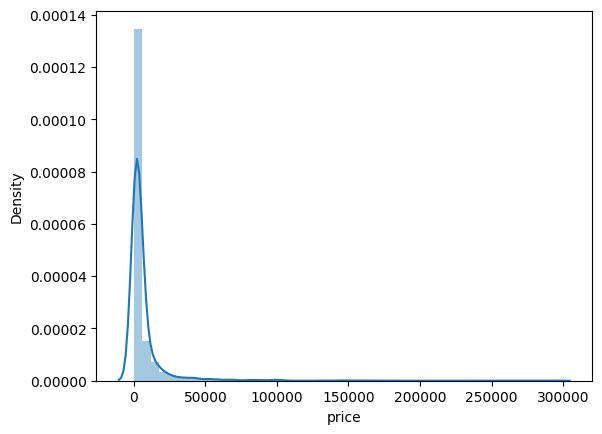

In [ ]:
sns.distplot(df_transformed['price'], kde=True)

Terlihat bahwa data `price` tidak berdistribusi normal.

## 8. Plot Hubungan Variabel `price` dengan Variabel lainnya

Tujuan pengecekan adalah untuk mengetahui hubungan antara variabel `price` dan variabel lainnya. Jika hubungan tidak signifikan atau tidak memiliki hubungan, maka variabel tersebut tidak perlu dijadikan fitur.

### a. Hubungan Variabel `price` dan `area`

<Axes: xlabel='area', ylabel='price'>

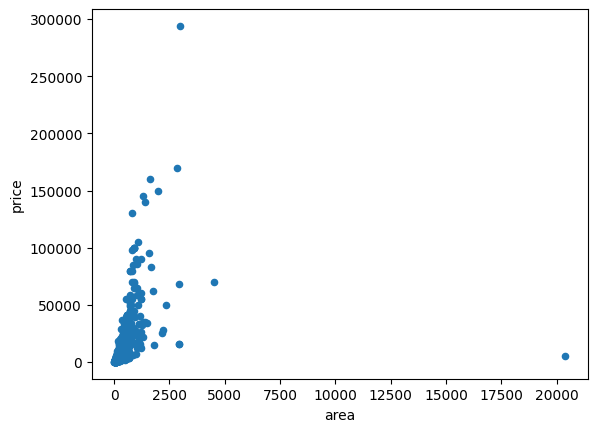

In [ ]:
data = pd.concat([df_transformed['price'], df_transformed['area']], axis=1)
data.plot.scatter(x='area', y='price')

Terlihat bahwa ada korelasi positive antara `price` dan `area`. Artinya ketika area rumah semakin besar, maka harga rumah cenderung semakin mahal. Walaupun terlihat 1 data outlier di sebelah kanan dan kiri atas. Data outlier ini mungkin perlu dihapus agar tidak mempengaruhi model yang akan dibuat.

Coba cari rumah dengan `area` di atas `20000 m2`

In [ ]:
df_transformed[df_transformed['area'] > 20000]

,city,title,price,location,area,building_area,bedrooms,bathrooms,garage
164,Jakarta Selatan,"Pasar Minggu, Rumah Siap Huni Di Dalam Komplek...",5500.0,"Pasar Minggu, Jakarta Selatan",20400.0,25000.0,4.0,2.0,2.0


#### Membuang Data yang Outlier

Sekarang kita akan membuang 1 data outlier di atas

In [ ]:
df_no_outlier = df_transformed.copy()
df_no_outlier = df_no_outlier[df_no_outlier['area'] < 20000]
len(df_no_outlier)

1840

### b. Hubungan Variabel `price` dan `building_area`

<Axes: xlabel='building_area', ylabel='price'>

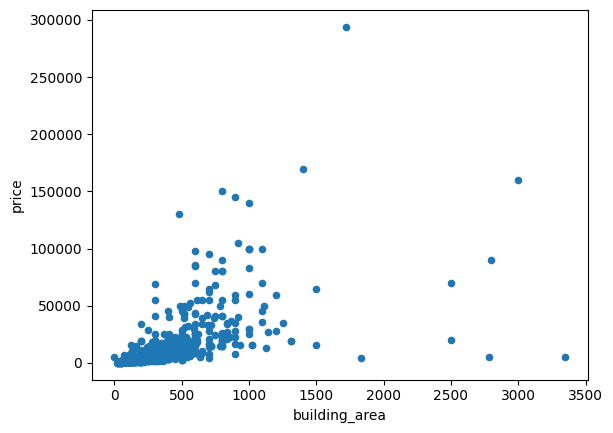

In [ ]:
data = pd.concat([df_no_outlier['price'], df_no_outlier['building_area']], axis=1)
data.plot.scatter(x='building_area', y='price')

Sekilas terdapat 4 data yang nampak outlier. Coba cari data `building_area` di atas 1800 dan `price` di bawah 40M

In [ ]:
df_no_outlier[(df_no_outlier['building_area'] > 1800) & (df_no_outlier['price'] < 40000)]

,city,title,price,location,area,building_area,bedrooms,bathrooms,garage
674,Jakarta Pusat,Rumah Kost 3 Lantai di Karang Anyar Sawah Besa...,5000.0,"Sawah Besar, Jakarta Pusat",160.0,3350.0,20.0,10.0,1.0
1175,Bogor,Rumah Di Kota Wisata Cluster Virginia,5500.0,"Kota Wisata, Bogor",425.0,2783.0,4.0,1.0,2.0
1202,Depok,Rumah Megapolitan Cinere Depok Luas 1125 Dekat...,20000.0,"Cinere, Depok",1125.0,2500.0,8.0,5.0,5.0
1450,Tangerang,Dijual Sangat Murah Rumah Alam Sutera Palmyra,4000.0,"Alam Sutera, Tangerang",200.0,1831.0,4.0,3.0,2.0


Hapus 4 data tersebut

In [ ]:
df_no_outlier = df_no_outlier[(df_no_outlier['building_area'] <= 1800) | (df_no_outlier['price'] >= 40000)]
len(df_no_outlier)

1836

## 9. Menampilkan Heatmap Correlation

Heatmap adalah visualisasi data dalam bentuk grid yang menampilkan nilai-nilai dalam bentuk warna. Pada correlation, nilai-nilai ini merepresentasi hubungan antara variabel. Semakin dekat warnanya dengan warna merah, semakin besar hubungan antara variabel tersebut (nilai korelasi mendekati 1, korelasi positif). Begitu juga, semakin dekat warnanya dengan warna biru, maka korelasi negatif. Jika nilai korelasi mendekati mendekati 0, maka kedua variabel tidak memiliki hubungan yang signifikan.

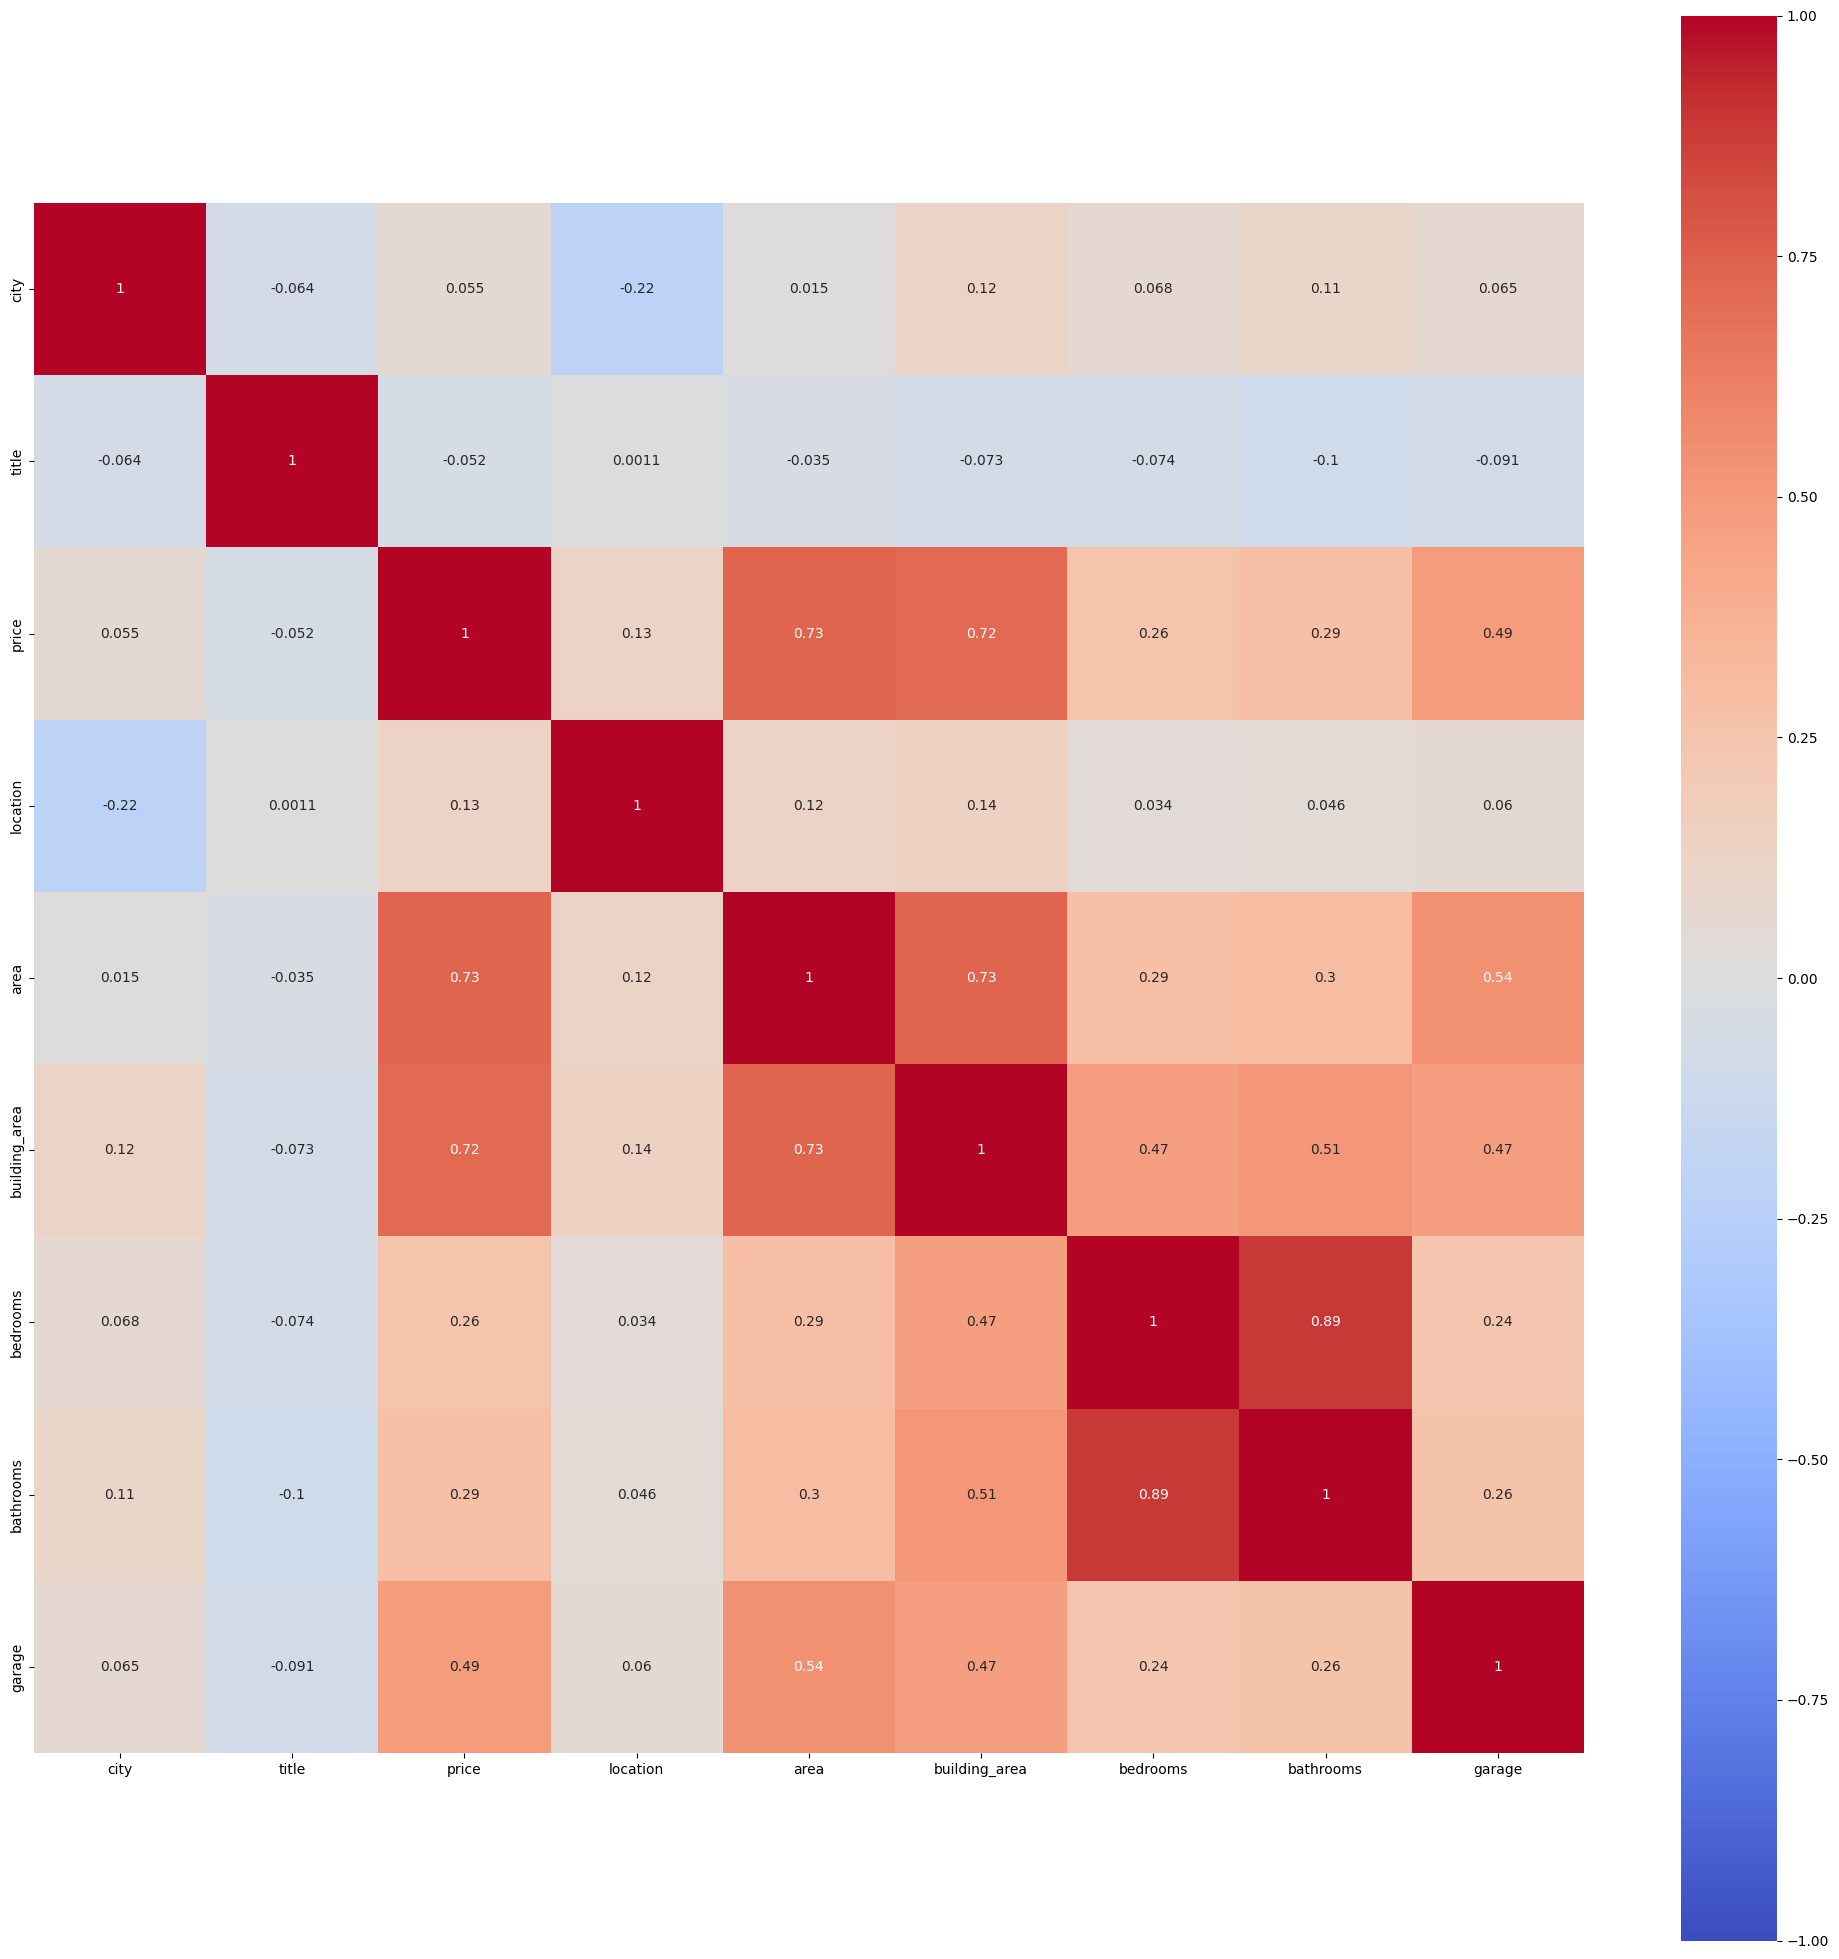

In [ ]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df_no_outlier.copy()
for column in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[column] = LabelEncoder().fit_transform(df_encoded[column])

corrmat = df_encoded.corr()

# membuat heatmap
f, ax = plt.subplots(figsize=(25, 25))
sns.heatmap(corrmat, vmin=-1, vmax=1, annot=True, square=True, cmap='coolwarm')
plt.show()

## 10. Simpan Data ke CSV

Setelah data bersih, maka perlu kita simpan ke dalam file CSV.

In [ ]:
df_no_outlier.to_csv('harga_rumah_clean.csv')